In [210]:
library(quantmod)
library(ggplot2)
library(tseries)
library(rugarch)
library(lmtest)
library(moments)

In [136]:
# Download Apple data from Yahoo Finance
getSymbols("AAPL", src = "yahoo", from = '2000-01-01', to = '2019-04-01', getSymbols.yahoo.warning=FALSE)

# Show first few rows from the dataset
head(AAPL)

[1] "AAPL"

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2000-01-03  3.745536  4.017857 3.631696   3.997768   133949200      2.665724
2000-01-04  3.866071  3.950893 3.613839   3.660714   128094400      2.440975
2000-01-05  3.705357  3.948661 3.678571   3.714286   194580400      2.476697
2000-01-06  3.790179  3.821429 3.392857   3.392857   191993200      2.262367
2000-01-07  3.446429  3.607143 3.410714   3.553571   115183600      2.369532
2000-01-10  3.642857  3.651786 3.383929   3.491071   126266000      2.327857

In [137]:
Price = as.xts(AAPL$AAPL.Adjusted)
names(Price) = c("price")

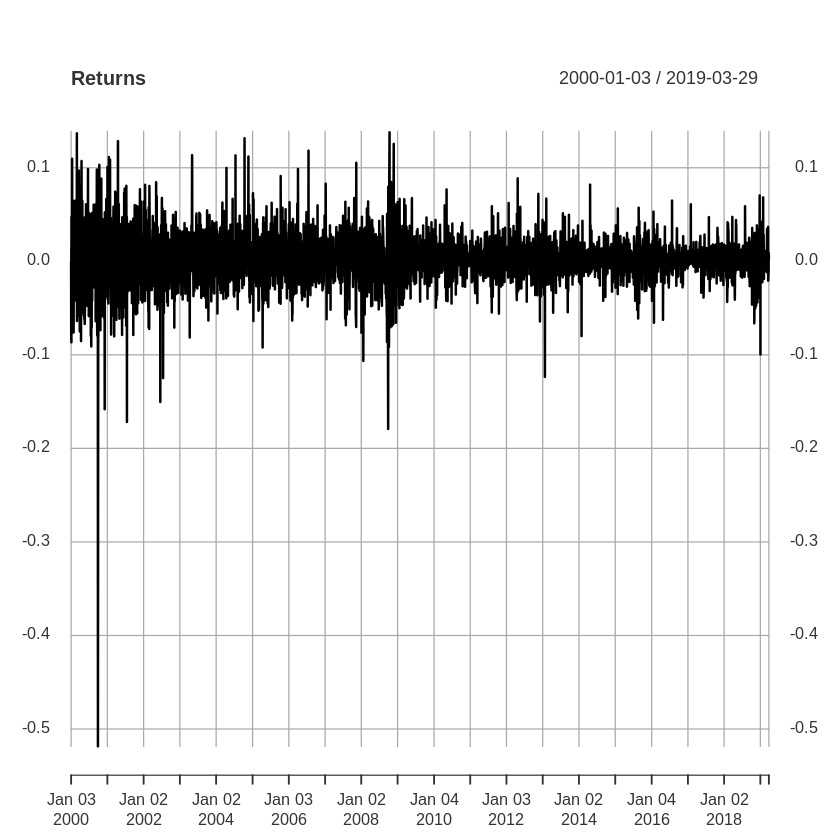

In [180]:
Returns = dailyReturn(Price)
plot(Returns)

In [213]:
returnsDf = as.data.frame(Returns)$daily.returns
shapiro.test(returnsDf)


	Shapiro-Wilk normality test

data:  returnsDf
W = 0.89249, p-value < 2.2e-16


In [214]:
skewness(returnsDf)
kurtosis(returnsDf)

[1] -1.628129

[1] 40.72374

In [140]:
adf.test(Returns)

Warning message in adf.test(Returns):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  Returns
Dickey-Fuller = -15.572, Lag order = 16, p-value = 0.01
alternative hypothesis: stationary


In [153]:
spec = ugarchspec(
    mean.model = list(armaOrder = c(0,0))
)
show(spec)


*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: sGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(0,0,0)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



In [156]:
fit = ugarchfit(spec, Returns)

In [157]:
show(fit)


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001993    0.000273   7.2965 0.000000
omega   0.000006    0.000002   3.4193 0.000628
alpha1  0.074409    0.008087   9.2007 0.000000
beta1   0.918599    0.009024 101.7903 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001993    0.000289   6.9023  0.00000
omega   0.000006    0.000006   1.1047  0.26929
alpha1  0.074409    0.024512   3.0356  0.00240
beta1   0.918599    0.025096  36.6038  0.00000

LogLikelihood : 11624.62 

Information Criteria
------------------------------------
                    
Akaike       -4.8019
Bayes        -4.7966
Shibata      -4.8019
Hannan-Quinn -4.8000

Weig

In [170]:
forecast = ugarchforecast(fit, n.ahead=15)
forecast


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 15
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=2019-03-29]:
       Series   Sigma
T+1  0.001993 0.01611
T+2  0.001993 0.01625
T+3  0.001993 0.01638
T+4  0.001993 0.01651
T+5  0.001993 0.01664
T+6  0.001993 0.01677
T+7  0.001993 0.01689
T+8  0.001993 0.01702
T+9  0.001993 0.01714
T+10 0.001993 0.01726
T+11 0.001993 0.01738
T+12 0.001993 0.01750
T+13 0.001993 0.01761
T+14 0.001993 0.01773
T+15 0.001993 0.01784



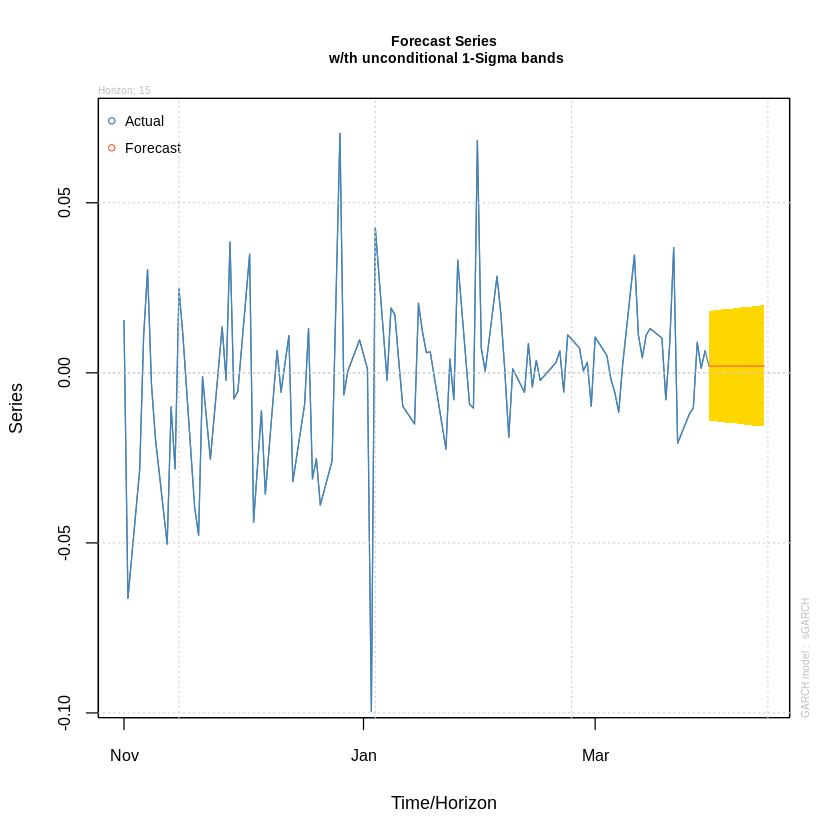

In [171]:
plot(forecast, which=1)

In [172]:
fit2 = ugarchfit(spec, Returns, solver='hybrid', out.sample = 50)

In [177]:
forecast2 = ugarchforecast(fit2, n.ahead=15, n.roll=10)

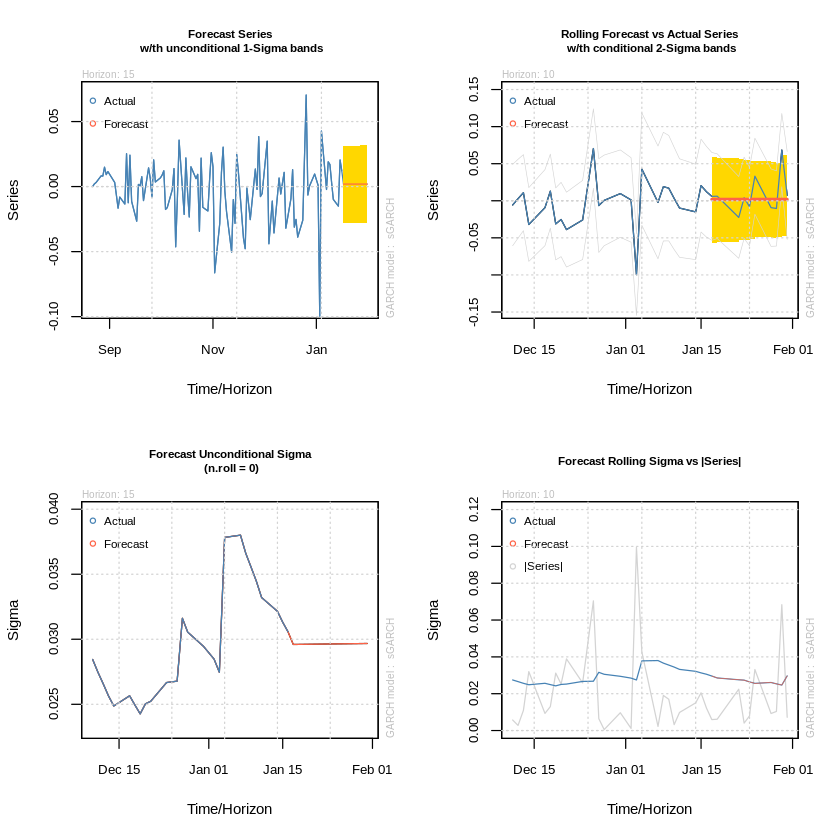

In [176]:
plot(forecast2, which="all")